In [4]:
import socnavgym
import gymnasium as gym
from socnavgym.wrappers import DiscreteActions
from socnavgym.wrappers import ExpertObservations

from rl.DSR import *
from tqdm.auto import trange
import imageio
from utils.StateDiscretizer import *
from utils.TileCoder import *

In [5]:
env = gym.make("SocNavGym-v1", config="./configs/4_humans.yaml") 
env = DiscreteActions(env)
env = ExpertObservations(env)

EPISODES = 1000

/home/adonis/miniconda3/envs/socnavgym/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:54: UserWarning: WARN: A Box action space maximum and minimum values are equal.
  logger.warn("A Box action space maximum and minimum values are equal.")


In [6]:
config = DSRConfig(
    action_size=7,
    learning_rate=6e-3,
    epsilon=0.05,
    gamma=0.99,
    device="cuda",   # or "cpu"
)

agent = DSRAgent(config)

rewards_msr = []
length_msr = []
for episode in trange(EPISODES):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.run_episode(env, obs)
    length_msr.append(episodes_length)
    rewards_msr.append(episodes_rewards)

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
all_length_msr = length_msr
all_reward_msr = rewards_msr
length_mean_msr = all_length_msr
reward_mean_msr = all_reward_msr

In [ ]:
def rolling_avg(x, w=40):
        return np.convolve(x, np.ones(w) / w, mode='valid')

In [ ]:
length_rolling_dsr = rolling_avg(length_mean_msr)
rewards_rolling_dsr = rolling_avg(reward_mean_msr)

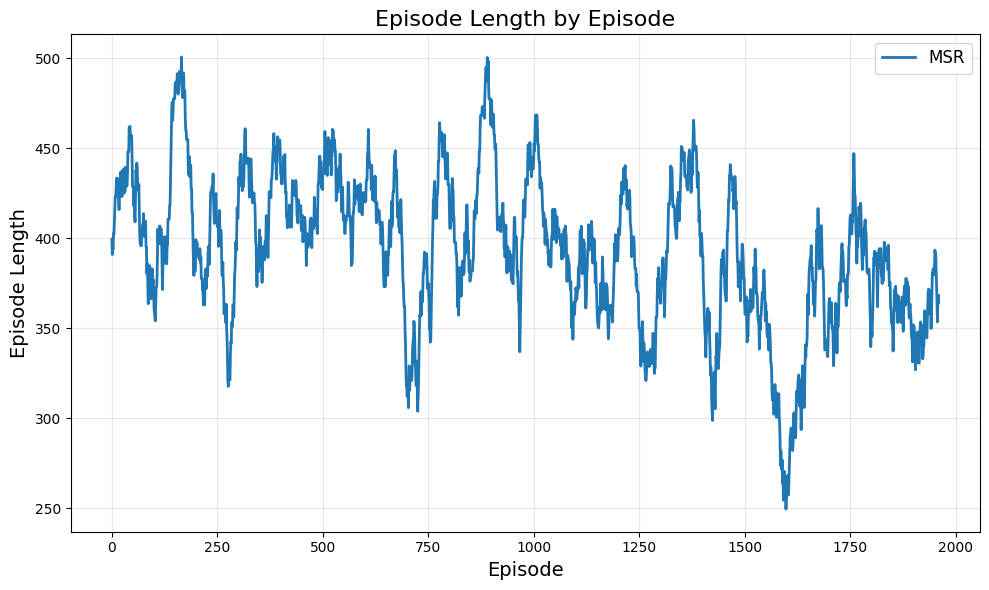

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(length_rolling_dsr,  linewidth=2, label="DSR")

ax.set_title("Episode Length by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Episode Length", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

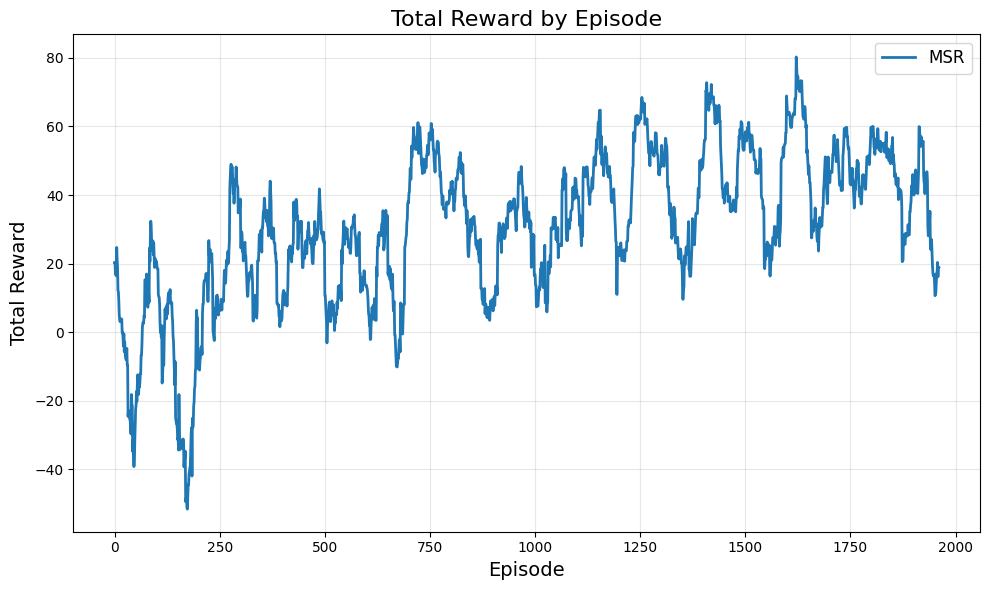

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(rewards_rolling_dsr,  linewidth=2, label="DSR")

ax.set_title("Total Reward by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Total Reward", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()